In [119]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

We're going to start off by reading our csv file. 
1. This will allow us to visualize the data 
2. Beging the process of loading and cleaning the dataset. 

In [4]:
data_path = '/Users/mohsenlhaf/Desktop/NBA/Data/MVP_STATS.csv' 
Data = pd.read_csv(data_path)
#Data.info()

#Dropping Columns that are not required. 
Data_Table = Data[['Rank','Player','Tm',
                          'team','Share', 'W', 
                          'W/L%', 'seed','player_efficiency_rating', 
                          'true_shooting_percentage','usage_percentage','box_plus_minus','year']]
Data_Table.head()

Rank               Player   Tm                team  Share     W   W/L%  \
0    1  Kareem Abdul-Jabbar  LAL  Los Angeles Lakers  0.665  60.0  0.732   
1    2        Julius Erving  PHI  Philadelphia 76ers  0.143  59.0  0.720   
2    3        George Gervin  SAS   San Antonio Spurs  0.086  41.0  0.500   
3    4           Larry Bird  BOS      Boston Celtics  0.068  61.0  0.744   
4   5T       Tiny Archibald  BOS      Boston Celtics  0.009  61.0  0.744   

   seed  player_efficiency_rating  true_shooting_percentage  usage_percentage  \
0   1.0                      25.3                     0.639              24.1   
1   2.0                      25.4                     0.568              30.3   
2   4.5                      24.0                     0.587              31.7   
3   1.0                      20.5                     0.538              25.3   
4   1.0                      15.3                     0.574              17.0   

   box_plus_minus  year  
0             7.2  1980  
1             7.6  1980  
2             3.9  1980  
3             4.5  1980  
4             1.1  1980

In [5]:
data_path2 = '/Users/mohsenlhaf/Desktop/NBA/Data/MVP_HISTORY.csv'
Data_MVP = pd.read_csv(data_path2)

#Dropping Columns that are not required.
#Turning Season column to string
#Filtering all the years prior to 1980. 

Data_Table_MVP = Data_MVP[['Season','Player','Nationality','Team']]
Data_Table_MVP = Data_Table_MVP.drop(Data_Table_MVP.index[0:24])

#Data_Table_MVP.info()
Data_Table_MVP.head()

Season                      Player    Nationality                    Team
24  1979–80  Kareem Abdul-Jabbar[g] (6)  United States  Los Angeles Lakers (3)
25  1980–81               Julius Erving  United States  Philadelphia 76ers (4)
26  1981–82            Moses Malone (2)  United States     Houston Rockets (2)
27  1982–83            Moses Malone (3)  United States  Philadelphia 76ers (5)
28  1983–84                  Larry Bird  United States      Boston Celtics (8)

These are the two CSV files that will be used for analysis. The required columns were kept in the respective dataframes and the rest was dropped. The next step will be to create some visualizations with the data that we collected. This will allow us to be able to plot all the metrics we collected against the MVP Share metric. The reason why we're plotting our variables against this specific metric is because the MVP Share is an accurate representation of a players probability of winning the MVP award. 

In [6]:
def add_win_lose_col(df):
    rank_lst = []
    for i in list(df['Rank']):
        if i == '1':
            rank_lst.append('won')
        else:
            rank_lst.append('lost')
    Data_Table_rank = df.copy()
    Data_Table_rank['Win/Lose'] = rank_lst
    
    return Data_Table_rank

In [7]:
def show_variable_vs_share(variables, df):
    fig = px.scatter(data_frame = df,
               x=variables,
               y='Share',
               color='Win/Lose',
               color_discrete_sequence=['red','black'])
    fig.update_layout(height=500,
                     title = f"{variables} vs MVP share")
    fig.show()

In [8]:
## Taking a look at the table after calling the method to visualize the dataframe. 

Data_Table_rank = add_win_lose_col(df=Data_Table)
Data_Table_rank.head()

Rank               Player   Tm                team  Share     W   W/L%  \
0    1  Kareem Abdul-Jabbar  LAL  Los Angeles Lakers  0.665  60.0  0.732   
1    2        Julius Erving  PHI  Philadelphia 76ers  0.143  59.0  0.720   
2    3        George Gervin  SAS   San Antonio Spurs  0.086  41.0  0.500   
3    4           Larry Bird  BOS      Boston Celtics  0.068  61.0  0.744   
4   5T       Tiny Archibald  BOS      Boston Celtics  0.009  61.0  0.744   

   seed  player_efficiency_rating  true_shooting_percentage  usage_percentage  \
0   1.0                      25.3                     0.639              24.1   
1   2.0                      25.4                     0.568              30.3   
2   4.5                      24.0                     0.587              31.7   
3   1.0                      20.5                     0.538              25.3   
4   1.0                      15.3                     0.574              17.0   

   box_plus_minus  year Win/Lose  
0             7.2  1980      won  
1             7.6  1980     lost  
2             3.9  1980     lost  
3             4.5  1980     lost  
4             1.1  1980     lost

### Scatterplot

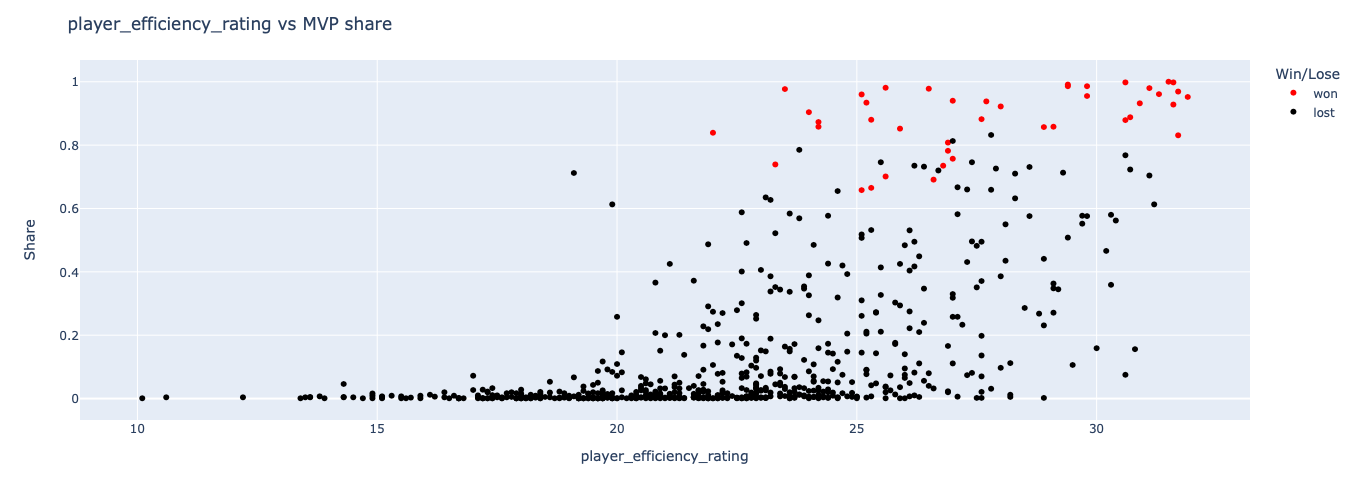

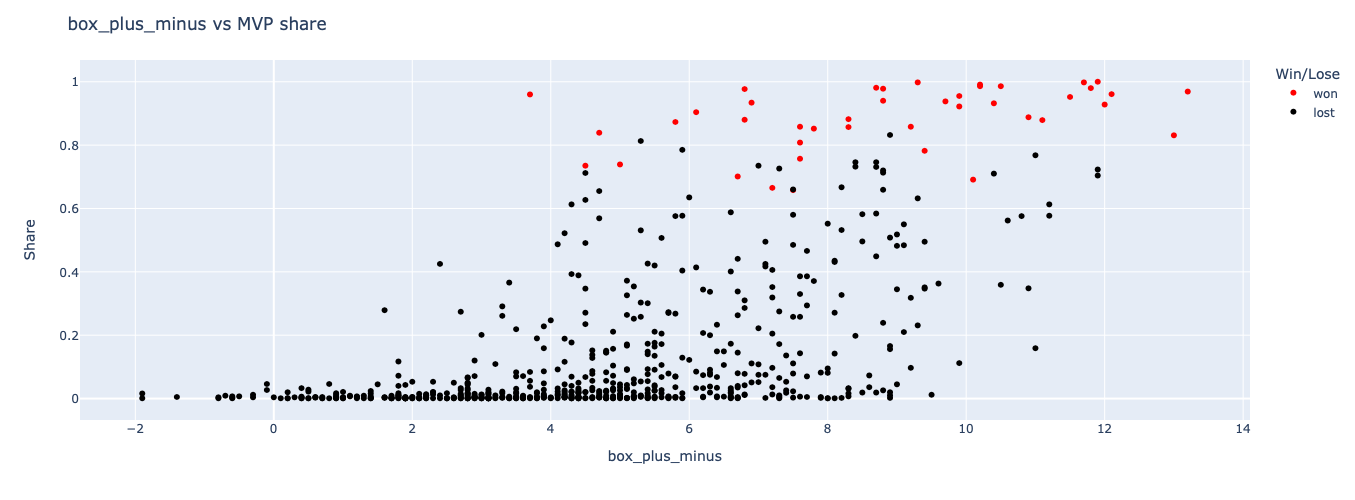

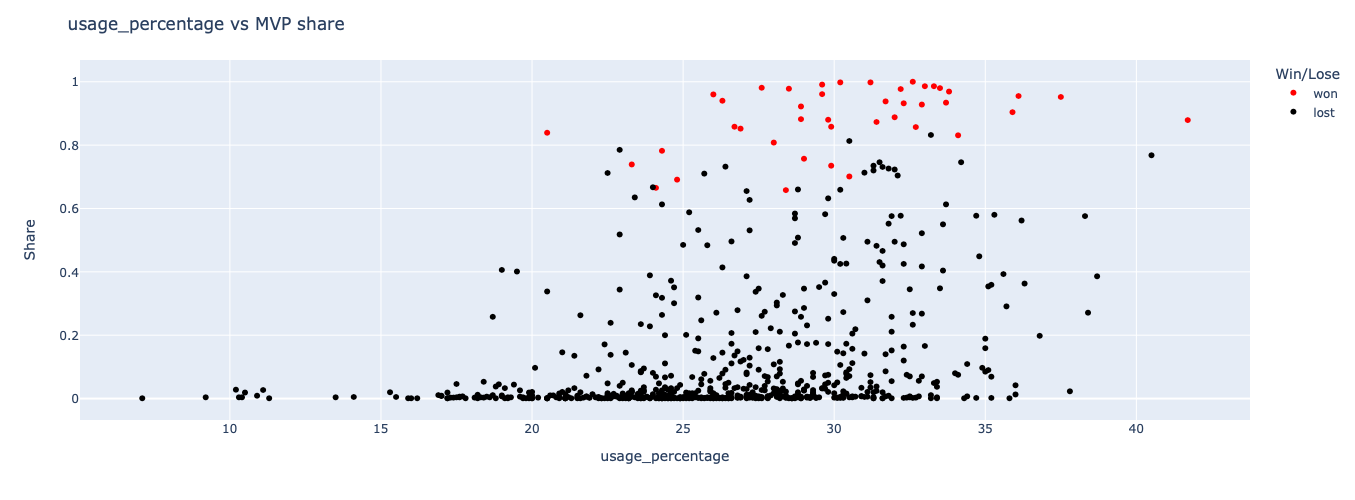

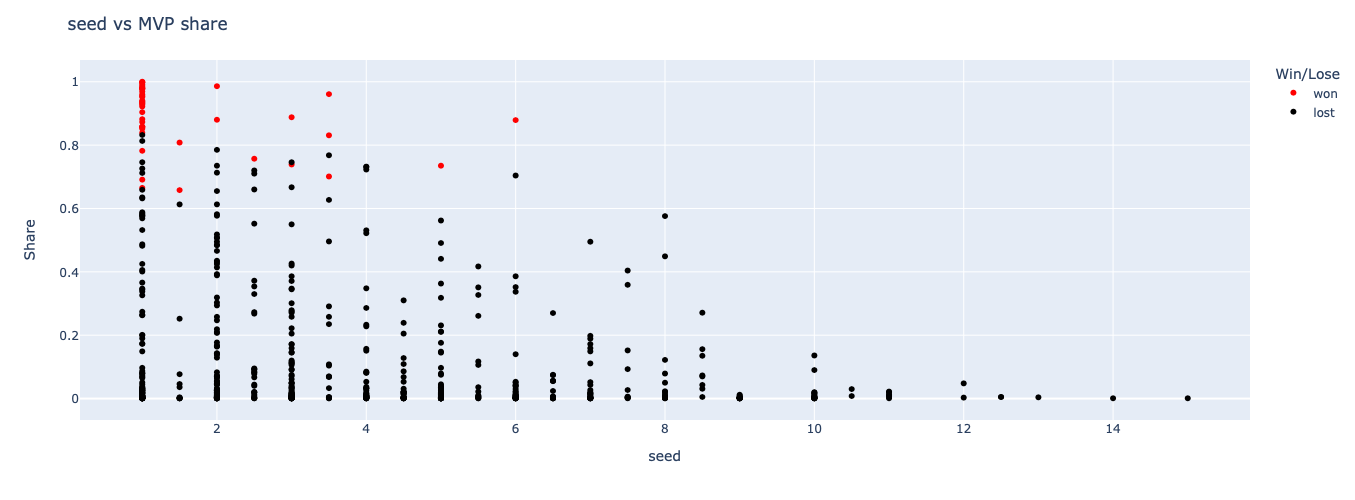

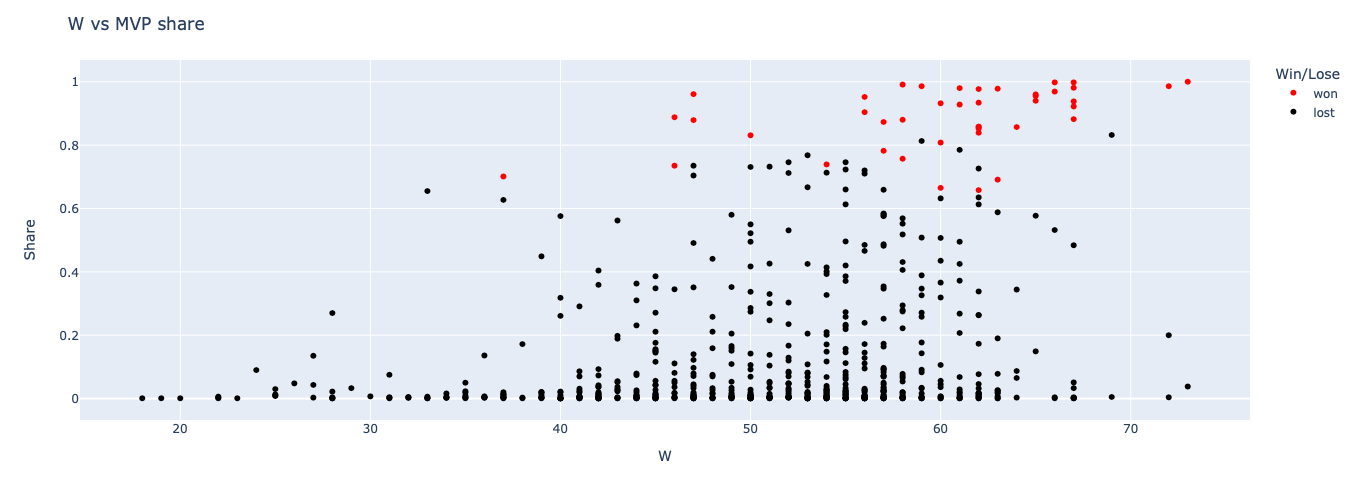

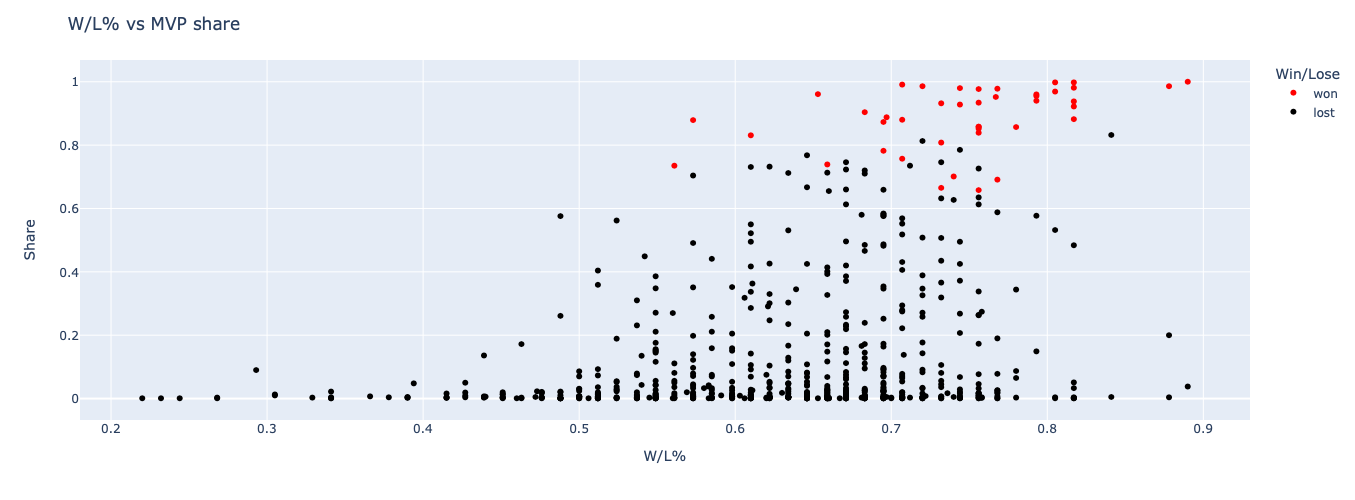

In [9]:
Variables = ['player_efficiency_rating',
            'box_plus_minus',
            'usage_percentage',
            'seed',
            'W',
            'W/L%']

Data_Table_rank = add_win_lose_col(df=Data_Table)

for Variables in Variables:
    show_variable_vs_share(variables=Variables, df=Data_Table_rank)

In [10]:
## Defining a method that displays the relevant pie chart 
## This pie chart will plot each variable against the Win/Lose and Shre metric 
## Both the Variable in question's mean and Share mean have been taken

def PieChart(df):
    WinCounter = 0
    MVPNumber = 41 
    
   # VariableMean = df[variable].mean()
    ShareMean = df['Share'].mean()
    BoxPlusMinusMean = df['box_plus_minus'].mean()
    UsagePercentageMean = df['usage_percentage'].mean()
    SeedMean = df['seed'].mean()
    WinMean = df['W'].mean()
    WinLosePercentageMean = df['W/L%'].mean()
 
    for index in df.index:
        if df['Win/Lose'].iloc[index] == "won" and df['Share'].iloc[index] >= ShareMean and df['box_plus_minus'].iloc[index] >= BoxPlusMinusMean and df['W'].iloc[index] >= WinMean and df['W/L%'].iloc[index] >= WinLosePercentageMean :
            WinCounter = WinCounter + 1
            
    Percentage = (WinCounter/MVPNumber)*100 
    Remaining = 100 - Percentage 
    
    PieChartData = [Percentage,Remaining] 
    Label = ["MVPs Above Metric Means", "MVPs Below Metric Means"]
    colors = ["Green","Yellow"]
    myexplode = [0.2, 0]
    
    fig = plt.figure(figsize =(5,10))
    plt.pie(PieChartData, labels = Label, colors = colors,autopct='%1.1f%%', 
            shadow=True, startangle=140, explode = myexplode, frame=False)
    
    plt.title("MVPs with metrics above associated means VS MVPs with metrics below associated means", loc= 'center')
            

    plt.show()

### Pie Chart 

We know that we have 679 players that were nominated to receive the MVP award. Knowing that there's only one MVP per season, this means that we only had 41 MVPs thus far. 
1.  This Pie Chart will display the percentage of MVPs whos metrics exceed their respective means (calculated by taking the mean of every column in the dataframe containing all MVP candidates and their metrics).  
 
Note: According to my research, it is shown that the seeding and the usage percentage aren't major factors in determining the MVP. This is because an MVP can definitly play for a lower tier team that doesn't make the playoffs or have a lower usage rate due to his higher shot efficiency or dominance in the paint. 

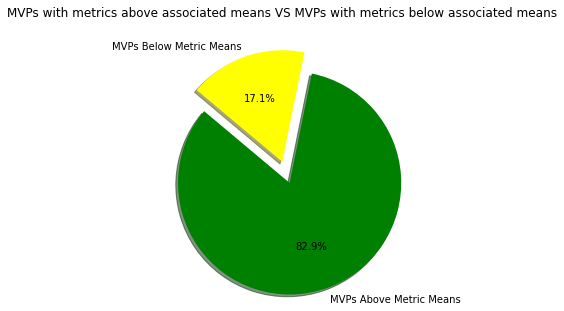

In [11]:
PieChart(Data_Table_rank)

### Linear Regression

What I did here is basically define a function that would take care of running splitting my data into testing and training sets. The function then runs a linear regression 
that would provide us with mean_absolute_error, R-squared value, Predicted and Actual MVP winner. I were to finish this project, I'd test other models to validate my findings and predict the MVP for this current season. 

In [117]:
def train_test_split_by_year(year, df, scaling=False):
    #test year = selected year, train year = other years outside of selected year
    
    train_df = df[df['year'] != year]
    test_df = df[df['year'] == year]
    
    columns = ["Rank", "Player", "Tm","team","Win/Lose"] 
    
    train_dff = train_df[['Share','W','W/L%','seed','player_efficiency_rating','true_shooting_percentage','usage_percentage','box_plus_minus','year']]
    test_dff = test_df[['Share','W','W/L%','seed','player_efficiency_rating','true_shooting_percentage','usage_percentage','box_plus_minus','year']]

    train_df2 = train_dff.copy()
    test_df2 = test_dff.copy()
    
    if scaling == True:
        sc_X = StandardScaler()
        sc_y = StandardScaler()
        train_df2 = sc_X.fit_transform(train_df2)
        test_df2 = sc_y.fit_transform(test_df2)
    
    X_train = train_df2.copy()
    Y_train = X_train["Share"]
    
    X_test = test_df2.copy()
    Y_test = X_test["Share"]

    X_train.drop('Share', axis=1, inplace=True)
    cols = X_train.columns
    X_test.drop('Share', axis=1, inplace=True)

    X_train = np.array(X_train)
    Y_train = np.array(Y_train)
    X_test  = np.array(X_test)
    Y_test  = np.array(Y_test)

    model = LinearRegression()
    model.fit(X_train,Y_train) 
   
    predictions = model.predict(X_test)
    MAE = mean_absolute_error(predictions, Y_test)
    R2 = r2_score(Y_test, predictions)
    
    mvp_race = df[df['year'] == year]
    mvp_race['predicted_share'] = predictions
    mvp_race = mvp_race.sort_values(["Share", "predicted_share"], ascending = (False, False))
    
    actual_winner = mvp_race[mvp_race['Share'] == mvp_race['Share'].max()]['Player']
    predicted_winner = mvp_race[mvp_race['predicted_share'] == mvp_race['predicted_share'].max()]['Player']
    
    mvp_race_df = pd.DataFrame(mvp_race)
    MVP_Predicted_Winner = predicted_winner.iloc[0]
    MVP_Actual_Winner = actual_winner.iloc[0]
    
    Dflength = len(mvp_race_df)
    
    return  model, R2, MAE, MVP_Predicted_Winner, MVP_Actual_Winner

In [118]:
train_test_split_by_year(1980, Data_Table_rank, scaling=False)

/var/folders/tf/g8tqvckj4xx5yv96fp662s9w0000gp/T/ipykernel_59796/1733829903.py:44: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(LinearRegression(),
 0.17992380173733846,
 0.1556819676361221,
 'Julius Erving',
 'Kareem Abdul-Jabbar')

Unfortunately, due to time constraints I was not able to work on other models that could further validate my findings. I tried to complete as many sections as possible and I stopped at training and testing me data. As mentioned eariler, if I had the time to continue, I would test out 1-2 other models and predict the 2021-2022 winner. Nontheless, I'm going to continue working on this project so that I can validate my hypothesis. I hope that you can give me feedback on what I have so far and I'm extemly sorry for not being able to complete everyhting. 